In [6]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../utils')
import simulation as sim
import numpy as np
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 200

# Definir el plano del hospital


In [7]:
width = 53
height = 36
hospital = sim.Hospital(width, height)

for i in range(width):
    hospital.add_element(sim.Wall((i, 0)))
    hospital.add_element(sim.Wall((i, height - 1)))
for i in range(height):
    hospital.add_element(sim.Wall((0, i)))
    hospital.add_element(sim.Wall((width-1, i)))
    
for y in range(36):
    l = (4, 5, 13, 19, 25, 31)
    if y not in l:
        hospital.add_element(sim.Wall((9, y)))
        
for x in range(9):
    for y in (10, 16, 22, 28):
        hospital.add_element(sim.Wall((x, y)))

for y in range(9):
    if y not in (5, 6):
        hospital.add_element(sim.Wall((14, y)))

for y in range(9, 19):
    for x in (14, 23, 32, 41):
        hospital.add_element(sim.Wall((x, y)))

for x in range(14, 52):
    hospital.add_element(sim.Wall((x, 9)))
    
    if x not in (19, 28, 38, 46, 18, 27, 36, 45):
        hospital.add_element(sim.Wall((x, 18)))
        
for x in range(29, 52):
    hospital.add_element(sim.Wall((x, 23)))

for x in range(29, 40):
    if x not in (34, 35):
        hospital.add_element(sim.Wall((x, 28)))

for y in range(23, 28):
    hospital.add_element(sim.Wall((29, y)))
    hospital.add_element(sim.Wall((39, y)))
    
hospital.add_element(sim.Entry((width-9, height-1)))
hospital.add_element(sim.Exit((width-8, height-1)))
hospital.add_element(sim.ICU((14, 5)))

for y in (13, 19, 25, 31):
    hospital.add_element(sim.DoctorOffice('general_practitioner', (3, y), (4, y)))
hospital.add_element(sim.DoctorOffice('psychiatrist', (3, 5), (4, 5)))
hospital.add_element(sim.DoctorOffice('surgeon', (18, 13), (18, 14)))
hospital.add_element(sim.DoctorOffice('pediatry', (27, 13), (27, 14)))
hospital.add_element(sim.DoctorOffice('gynecologist', (36, 13), (36, 14)))
hospital.add_element(sim.DoctorOffice('geriatrics', (45, 13), (45, 14)))

hospital.add_element(sim.Receptionist((45, 25), (45, 27)))
hospital.add_element(sim.Receptionist((48, 25), (48, 27)))

hospital.add_element(sim.Triage((35, 26)))

for x in range(14, 28, 2):
    for y in range(22, 31, 2):
        hospital.add_element(sim.Chair((x, y)))

# Imprime el hospital para tener algún tipo de feedback
hospital.plot().to_console()

############################################EX#######
#        #                                          #
#        #                                          #
#        #                                          #
#  DP                                               #
#        #    h h h h h h h                         #
#        #                                          #
##########    h h h h h h h  #####  ####            #
#        #                   #         #     P  P   #
#        #    h h h h h h h  #     T   #            #
#  DP                        #         #     R  R   #
#        #    h h h h h h h  #         #            #
#        #                   ########################
##########    h h h h h h h                         #
#        #                                          #
#        #                                          #
#  DP                                               #
#        #    ####  #######  ####### # ######  ######
#        #    #        #    

# Agrega los parámetros de simulación

In [8]:
    
hospital.parameters = {
    'objects': {
        'chair': {
            'infect_probability': 0.1,
            'cleaning_interval': sim.TimePeriod(0, 2, 0, 0),
            'radius': 0.1
        },
        'bed': {
            'infect_probability': 0.0,
            'radius': 0.0,
            'cleaning_interval': sim.TimePeriod(0, 2, 0, 0)
        }
    },
    'icu': {
        'environment': {
            'infection_probability': 0.1
        },
        'beds': 5,
        'death_probability': 0.05,
        'sleep_times': [
            {
                'time': sim.TimePeriod(1, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(2, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(4, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(8, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(16, 0, 0, 0),
                'probability': 0.2
            }
        ]
    },
    'reception': {
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'triage': {
        'icu': {
            'death_probability': 0.2,
            'probability': 0.070724557
        },
        'doctors_probabilities': [
            {
                'specialty': 'general_practitioner',
                'probability': 0.444567551
            },
            {
                'specialty': 'psychiatrist',
                'probability': 0.045610876
            },
            {
                'specialty': 'surgeon',
                'probability': 0.292939085
            },
            {
                'specialty': 'pediatry',
                'probability': 0.051335318
            },
            {
                'specialty': 'gynecologist',
                'probability': 0.075895021
            },
            {
                'specialty': 'geriatrics',
                'probability': 0.018927592
            },
        ],
        'levels': [
            {
                'level': 1,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 0, 0)
            },
            {
                'level': 2,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 15, 0)
            },
            {
'level': 3,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 30, 0)
            },
            {
                'level': 4,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 1, 0, 0)
            },
            {
                'level': 5,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 2, 0, 0)
            }
        ],
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'doctors': [
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'general_practitioner'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'psychiatrist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'surgeon'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'gynecologist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'geriatrics'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'pediatry'
        },
    ],
    'patient': {
        'walk_speed': 0.2,
        'influx': np.array([[random.randint(1, 10) for i in range(12)] for j in range(365)]),
        'infected_probability': 0.3
    },
    'human': {
        'infect_distance': 2.0,
        'contamination_probability': 0.1,
        'incubation_time': sim.TimePeriod(0, 2, 0, 0),
        'infect_probability': 0.5
    },
    'personnel': {
        'immunity': 0.4
    },
    'environments': {
        'icu': {
            'infection_probability': 0.8
        }
    }
}

# Valida que esten todos los parámetros necesarios
hospital.validate()

# Define las propiedades de ejecución
(Parámetros relacionados al sistema o la ejecución y no al hospital)

In [9]:
props = sim.SimulationProperties(1, 1)

In [10]:
run = sim.Simulation(props, hospital, tag='latest')
run.run(print_command=True)

/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec -np 1 /home/martin/Repositories/sti-hpc/build/sti-demo /home/martin/Repositories/sti-hpc/run/c9d591976d7b59dcf87b461968c4879c/config.props /home/martin/Repositories/sti-hpc/run/c9d591976d7b59dcf87b461968c4879c/model.props




# Analiza la performance un poco

In [11]:
import sys
sys.path.append('../utils')
import performance as perf

metrics = perf.Metrics(f"{run.folder}")

In [12]:
print(f"Simulation time: {metrics.total_time}")

Simulation time: 0 days 00:00:33.856953214


In [13]:
try:
    metrics.plot().pie()
except AttributeError:
    pass

In [14]:
try:
    metrics.plot().plot(0)
except AttributeError:
    pass

# Analiza el comportamiento de los agentes

In [22]:
import postprocess as pp
import pandas as pd

In [23]:
agents = pp.AgentsOutput(f"{run.folder}")

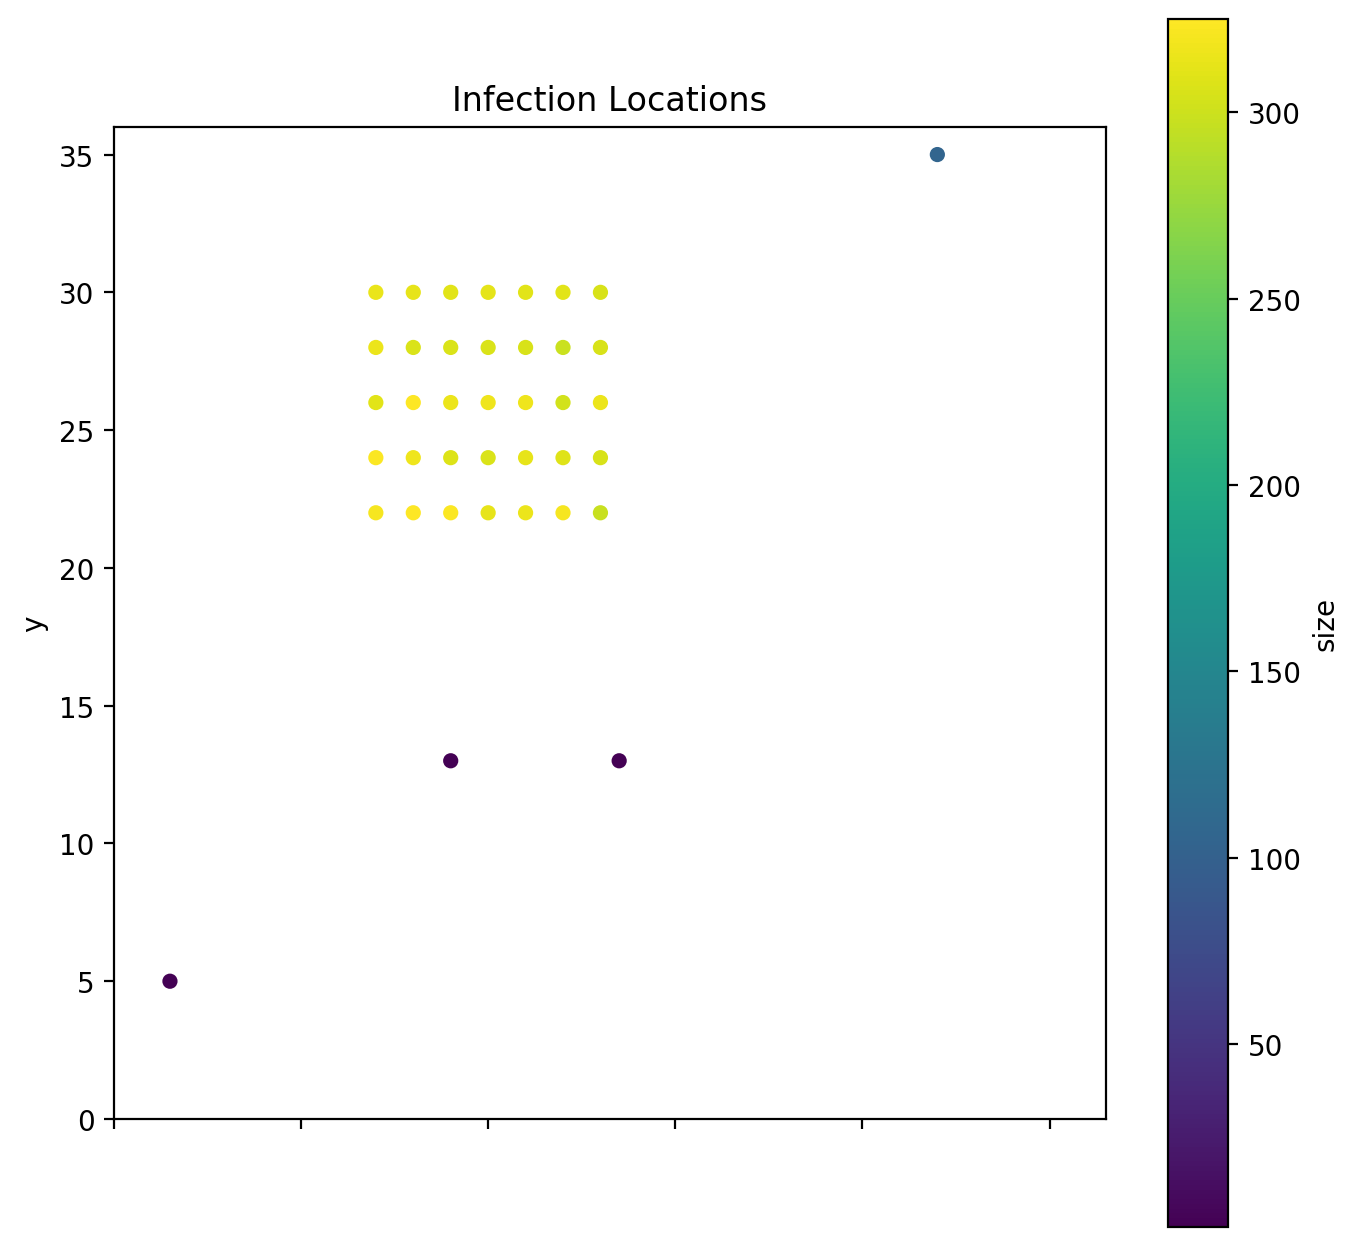

In [24]:
df = pd.concat([agents.patients, agents.staff])
oc = df[['infect_location.x', 'infect_location.y']]
oc = oc.rename(columns={'infect_location.x' : 'x', 'infect_location.y' : 'y'})
oc = oc[(oc['x'] != 0.0) | (oc['y'] != 0.0)]
oc = oc.groupby(['x', 'y'], as_index=False).size()
ax = oc.plot.scatter(x='x', y='y', c='size', colormap='viridis',
                     xlim=(0, hospital.dimensions[0]),
                     ylim=(0, hospital.dimensions[1]),
                     title='Infection Locations'
                     )
ax.set_aspect(hospital.dimensions[0] / hospital.dimensions[1])

In [31]:
dead = agents.patients[agents.patients.last_state ==  'MORGUE'].dropna(axis='columns')
dead['in_hospital'] = dead['exit_time'] - dead['entry_time']
dead['walking_time'] = dead['in_hospital'] - dead['sleep_time']
dead

,repast_id,type,entry_time,exit_time,last_state,process,infection_id,infection_model,infection_mode,infection_stage,infection_time,infected_by,infect_location.x,infect_location.y,diagnosis_type,sleep_time,survives,in_hospital,walking_time
0,1289.0.1,patient,19 days 12:00:00,22 days 13:36:00,MORGUE,0,human.1289.0.1,human,normal,sick,20 days 11:59:00,chair.0.18,18.0,28.0,icu,2 days,False,3 days 01:36:00,1 days 01:36:00
1,2321.0.1,patient,34 days 14:30:00,51 days 20:36:00,MORGUE,0,human.2321.0.1,human,normal,sick,35 days 17:42:00,chair.0.23,20.0,28.0,icu,16 days,False,17 days 06:06:00,1 days 06:06:00
2,3396.0.1,patient,50 days 18:30:00,68 days 01:28:00,MORGUE,0,human.3396.0.1,human,normal,sick,51 days 22:09:00,chair.0.32,24.0,26.0,icu,16 days,False,17 days 06:58:00,1 days 06:58:00
3,4455.0.1,patient,68 days 07:09:00,73 days 13:47:00,MORGUE,0,human.4455.0.1,human,normal,sick,69 days 11:04:00,chair.0.29,22.0,30.0,icu,4 days,False,5 days 06:38:00,1 days 06:38:00
4,6342.0.1,patient,98 days 08:00:00,100 days 13:48:00,MORGUE,0,human.6342.0.1,human,normal,sick,99 days 11:08:00,chair.0.37,26.0,26.0,icu,1 days,False,2 days 05:48:00,1 days 05:48:00
5,7301.0.1,patient,112 days 11:30:00,121 days 18:24:00,MORGUE,0,human.7301.0.1,human,normal,sick,113 days 16:47:00,chair.0.14,16.0,30.0,icu,8 days,False,9 days 06:54:00,1 days 06:54:00
6,10082.0.1,patient,153 days 20:00:00,157 days 02:37:00,MORGUE,0,human.10082.0.1,human,normal,sick,155 days 01:10:00,chair.0.39,26.0,30.0,icu,2 days,False,3 days 06:37:00,1 days 06:37:00
7,15655.0.1,patient,237 days 22:20:00,243 days 05:13:00,MORGUE,0,human.15655.0.1,human,normal,sick,239 days 03:39:00,chair.0.28,22.0,28.0,icu,4 days,False,5 days 06:53:00,1 days 06:53:00
8,16656.0.1,patient,252 days 22:27:00,262 days 02:50:00,MORGUE,0,human.16656.0.1,human,normal,sick,254 days 01:16:00,chair.0.31,24.0,24.0,icu,8 days,False,9 days 04:23:00,1 days 04:23:00
9,16985.0.1,patient,257 days 22:00:00,263 days 05:15:00,MORGUE,0,human.16985.0.1,human,normal,sick,259 days 02:00:00,chair.0.7,14.0,26.0,icu,4 days,False,5 days 07:15:00,1 days 07:15:00


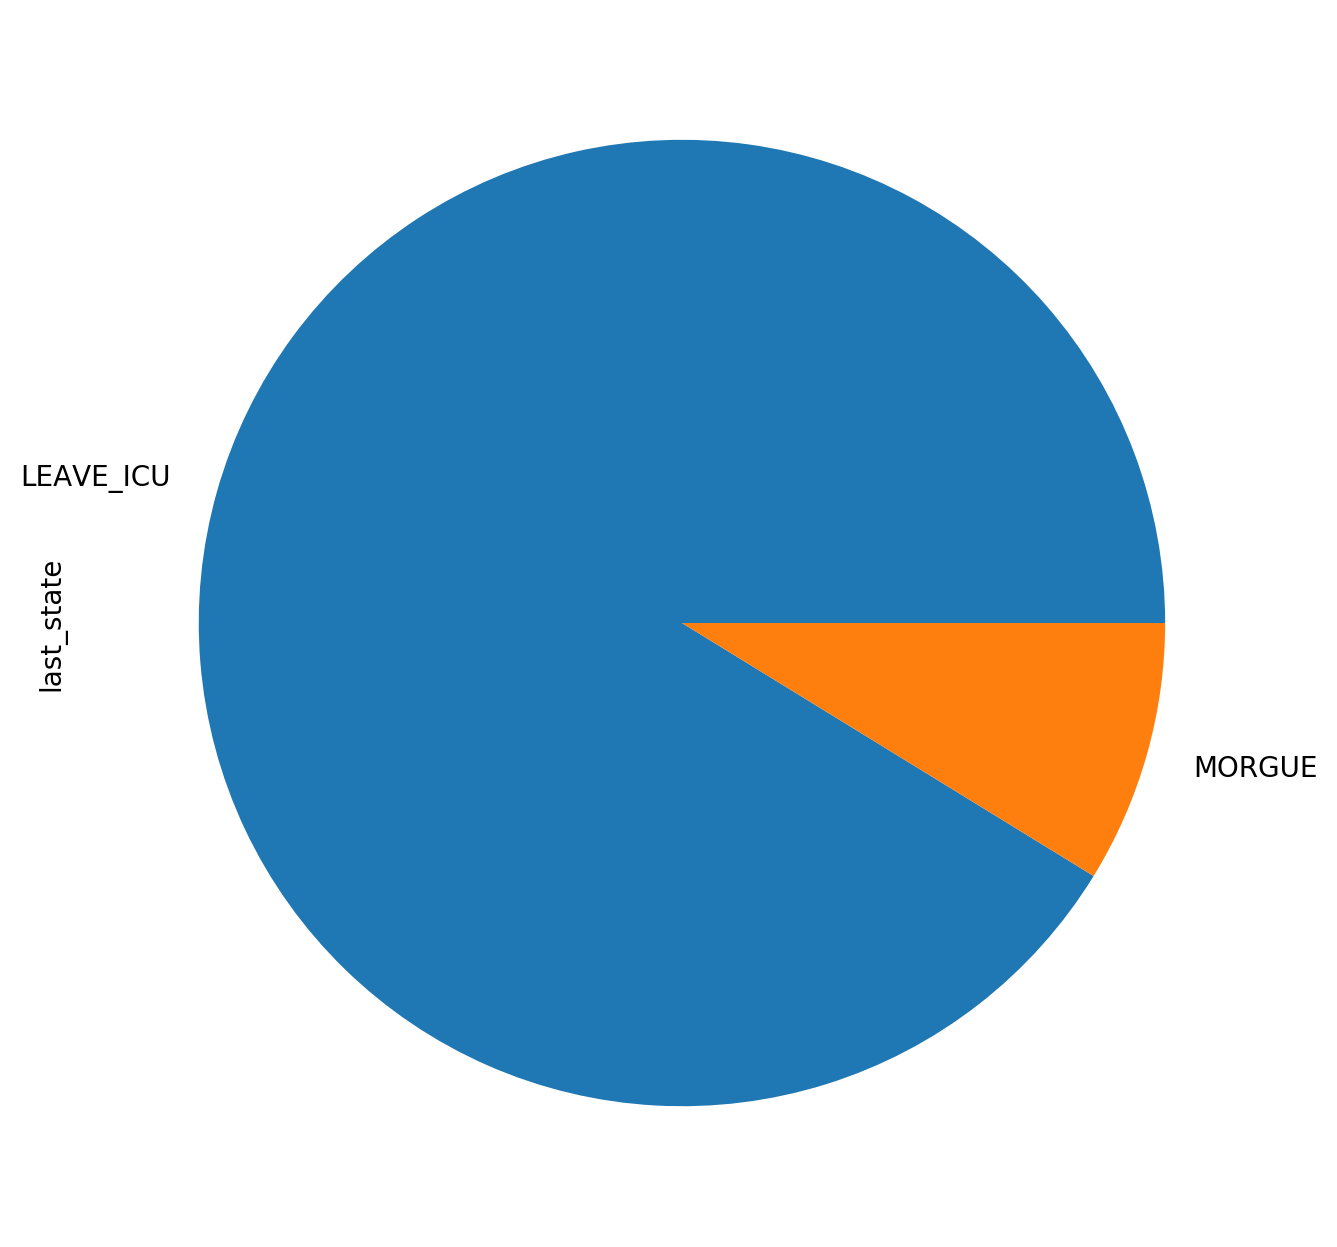

In [44]:
df = agents.patients
df[(df['last_state'] == 'LEAVE_ICU') | (df['last_state'] == 'MORGUE')]['last_state'].value_counts().plot.pie()